In [5]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the 'quality' column
label_encoder = LabelEncoder()
df["quality_label"] = label_encoder.fit_transform(df["quality"])

# One-Hot Encoding for quality
df_encoded = pd.get_dummies(df, columns=["quality"], prefix="quality")
print(df_encoded.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 10.0                  47.0  1.00080  3.25       0.57   
1                  5.0                  16.0  0.99940  3.16       0.63   
2                  5.0                  14.0  0.99660  3.63       0.54   
3                 34.0                  48.0  0.99832  3.38       0.86   
4                  6.0                  11.0  0.99892  3.48       0.49   

   alcohol  quality_label  quality_3  quality_4  quality_5  quality_6  \
0      9.0   

In [6]:
# Creating new derived columns
df["acidity_ratio"] = df["volatile_acidity"] / (df["fixed_acidity"] + 1e-5)  # Avoid division by zero
df["sulfur_ratio"] = df["free_sulfur_dioxide"] / (df["total_sulfur_dioxide"] + 1e-5)

print(df[["acidity_ratio", "sulfur_ratio"]].head())


   acidity_ratio  sulfur_ratio
0       0.050000      0.212766
1       0.058654      0.312500
2       0.160135      0.357143
3       0.042308      0.708333
4       0.122891      0.545454


In [7]:
# Grouping by 'quality' and calculating mean alcohol content
quality_group = df.groupby("quality")["alcohol"].mean().reset_index()

print(quality_group)


   quality    alcohol
0        3  11.624750
1        4  11.553267
2        5  10.371093
3        6  10.646033
4        7  11.619100
5        8  11.595200
6        9  11.632567


In [8]:
# Creating a pivot table
pivot_table = df.pivot_table(values=["alcohol", "pH"], index="quality", aggfunc="mean")
print(pivot_table)


           alcohol        pH
quality                     
3        11.624750  3.131097
4        11.553267  3.133877
5        10.371093  3.191470
6        10.646033  3.213137
7        11.619100  3.170117
8        11.595200  3.137180
9        11.632567  3.134107


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for scaling
num_cols = [
    "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar",
        "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density",
            "pH", "sulphates", "alcohol"
            ]

            # Initialize MinMaxScaler
scaler = MinMaxScaler()

            # Apply scaling
df_minmax = df.copy()
df_minmax[num_cols] = scaler.fit_transform(df[num_cols])

            # Display the first few rows of the scaled dataset
print(df_minmax.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.644628          0.333333     0.397590        0.024540   0.107973   
1       0.545455          0.353333     0.295181        0.023006   0.317276   
2       0.297521          0.736667     0.000000        0.055982   0.146179   
3       0.545455          0.240000     0.253012        0.013804   0.225914   
4       0.371901          0.626667     0.012048        0.042945   0.124585   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0             0.031250              0.094470  0.263929  0.410853   0.196629   
1             0.013889              0.023041  0.236939  0.341085   0.230337   
2             0.013889              0.018433  0.182957  0.705426   0.179775   
3             0.114583              0.096774  0.216117  0.511628   0.359551   
4             0.017361              0.011521  0.227685  0.589147   0.151685   

    alcohol  quality  quality_label  acidity_ratio  sulf

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df[num_cols])

print(df_standardized.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.746903         -0.533679    -0.347872       -1.529816  -1.010526   
1       0.249775         -0.451489    -0.789632       -1.535075  -0.001962   
2      -0.993047          1.123827    -2.062940       -1.422006  -0.826423   
3       0.249775         -0.917234    -0.971533       -1.566629  -0.442208   
4      -0.620201          0.671780    -2.010969       -1.466707  -0.930481   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.547874             -1.816801 -0.762353  0.532705  -1.103717   
1            -1.612670             -2.126242 -0.878712  0.007517  -0.956764   
2            -1.612670             -2.146206 -1.111431  2.750170  -1.177194   
3            -1.236854             -1.806819 -0.968475  1.291312  -0.393445   
4            -1.599710             -2.176151 -0.918607  1.874855  -1.299654   

    alcohol  quality  quality_label  acidity_ratio  sulf

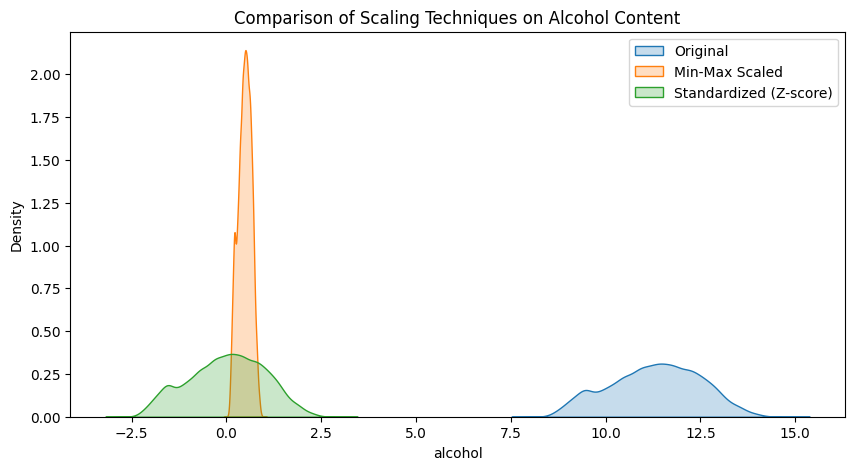

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

# Plot original alcohol distribution
sns.kdeplot(df["alcohol"], label="Original", fill=True)

# Plot Min-Max Scaled alcohol distribution
sns.kdeplot(df_minmax["alcohol"], label="Min-Max Scaled", fill=True)

# Plot Standardized alcohol distribution
sns.kdeplot(df_standardized["alcohol"], label="Standardized (Z-score)", fill=True)

plt.title("Comparison of Scaling Techniques on Alcohol Content")
plt.legend()
plt.show()


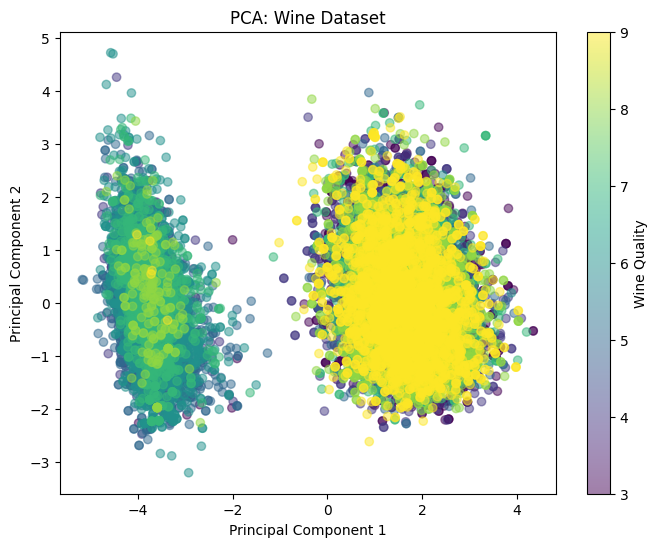

In [15]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
df_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])

# Plot PCA components
plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], alpha=0.5, c=df["quality"], cmap="viridis")
plt.colorbar(label="Wine Quality")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: Wine Dataset")
plt.show()


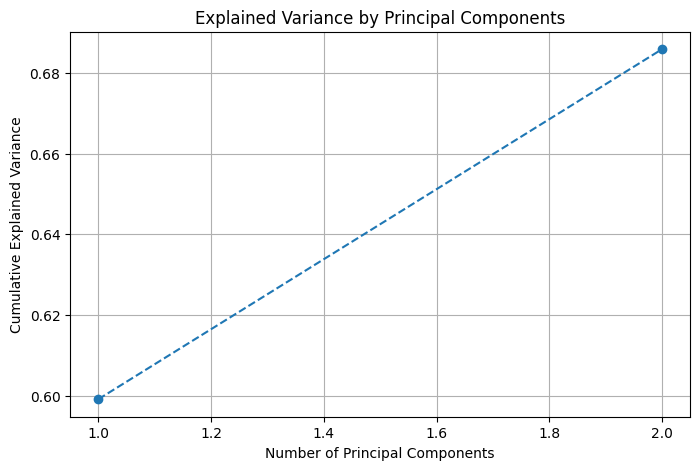

In [16]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()
